In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
n_users = 120
days_per_user = 30

data = []

for user_id in range(1, n_users + 1):
    for day in range(days_per_user):
        screen_time = np.clip(np.random.normal(6, 2), 1, 14)
        physical_activity = np.clip(np.random.normal(40, 20), 0, 120)
        sleep_hours = np.clip(np.random.normal(7, 1.2), 4, 10)
        social_interaction = np.random.randint(0, 11)

        # mood influenced by habits (noisy but coherent)
        mood = (
            7
            - 0.25 * (screen_time - 5)
            + 0.03 * physical_activity
            + 0.4 * (sleep_hours - 7)
            + 0.15 * social_interaction
            + np.random.normal(0, 1)
        )

        stress = (
            6
            + 0.3 * (screen_time - 5)
            - 0.02 * physical_activity
            - 0.4 * (sleep_hours - 7)
            + np.random.normal(0, 1)
        )

        data.append([
            user_id,
            pd.Timestamp("2024-01-01") + pd.Timedelta(days=day),
            round(screen_time, 2),
            int(physical_activity),
            round(sleep_hours, 2),
            social_interaction,
            int(np.clip(round(mood), 1, 10)),
            int(np.clip(round(stress), 1, 10))
        ])

columns = [
    "user_id",
    "date",
    "screen_time_hours",
    "physical_activity_minutes",
    "sleep_hours",
    "social_interaction",
    "mood_score",
    "stress_level"
]

df = pd.DataFrame(data, columns=columns)

In [3]:
df.head()

,user_id,date,screen_time_hours,physical_activity_minutes,sleep_hours,social_interaction,mood_score,stress_level
0,1,2024-01-01,6.99,37,7.78,6,10,5
1,1,2024-01-02,5.75,0,6.41,7,7,6
2,1,2024-01-03,4.86,21,4.00,0,7,4
3,1,2024-01-04,7.21,34,6.80,2,8,6
4,1,2024-01-05,8.27,37,6.37,1,9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    3600 non-null   int64         
 1   date                       3600 non-null   datetime64[ns]
 2   screen_time_hours          3600 non-null   float64       
 3   physical_activity_minutes  3600 non-null   int64         
 4   sleep_hours                3600 non-null   float64       
 5   social_interaction         3600 non-null   int64         
 6   mood_score                 3600 non-null   int64         
 7   stress_level               3600 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 225.1 KB


In [5]:
df.describe()

,user_id,date,screen_time_hours,physical_activity_minutes,sleep_hours,social_interaction,mood_score,stress_level
count,3600.000000,3600,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,60.500000,2024-01-15 11:59:59.999999744,6.066139,39.753056,7.019647,4.968889,8.540000,5.521667
min,1.000000,2024-01-01 00:00:00,1.000000,0.000000,4.000000,0.000000,3.000000,1.000000
25%,30.750000,2024-01-08 00:00:00,4.727500,26.000000,6.220000,2.000000,8.000000,5.000000
50%,60.500000,2024-01-15 12:00:00,6.060000,39.000000,7.020000,5.000000,9.000000,6.000000
75%,90.250000,2024-01-23 00:00:00,7.410000,54.000000,7.830000,8.000000,10.000000,6.000000
max,120.000000,2024-01-30 00:00:00,13.200000,111.000000,10.000000,10.000000,10.000000,10.000000
std,34.644625,NaN,1.962265,19.831097,1.196055,3.161685,1.279527,1.371555


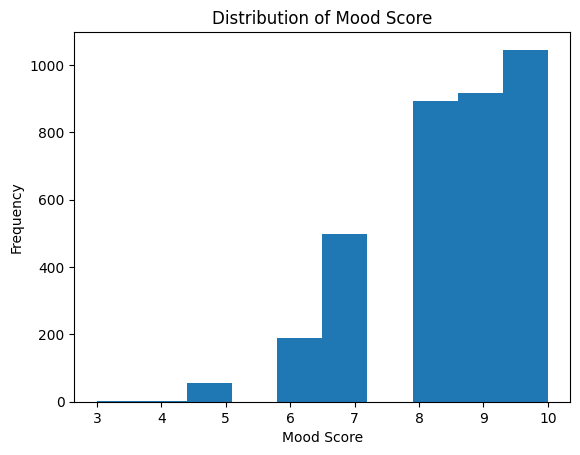

In [6]:
plt.figure()
plt.hist(df["mood_score"], bins=10)
plt.title("Distribution of Mood Score")
plt.xlabel("Mood Score")
plt.ylabel("Frequency")
plt.show()

The distribution of mood shows a concentration of high values, which is consistent with a general population dataset and not a clinical one. The lower frequency of low values ​​may indicate that more negative moods are less frequent, although still relevant.

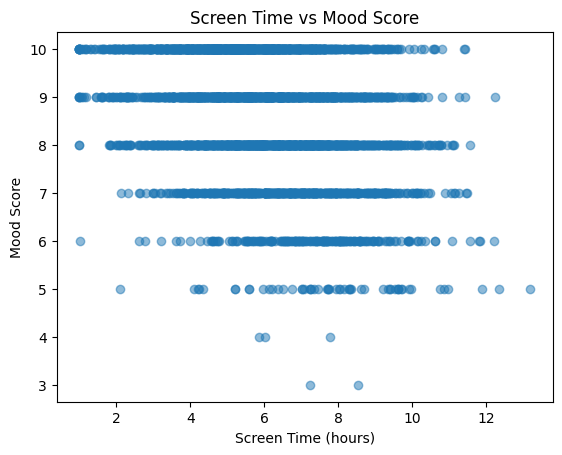

In [9]:
plt.figure()
plt.scatter(df["screen_time_hours"], df["mood_score"], alpha=0.5)
plt.title("Screen Time vs Mood Score")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Mood Score")
plt.show()

A weak negative trend is observed between screen time and mood. While the relationship is neither linear nor deterministic, higher screen time values ​​are associated with a lower concentration of elevated moods.

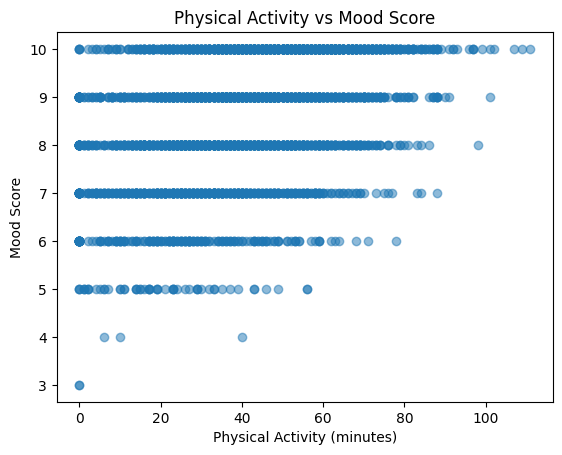

In [10]:
plt.figure()
plt.scatter(df["physical_activity_minutes"], df["mood_score"], alpha=0.5)
plt.title("Physical Activity vs Mood Score")
plt.xlabel("Physical Activity (minutes)")
plt.ylabel("Mood Score")
plt.show()

A positive relationship is observed between daily physical activity and mood. Starting at moderate levels of activity, mood scores tend to be higher, with fewer instances of low mood.

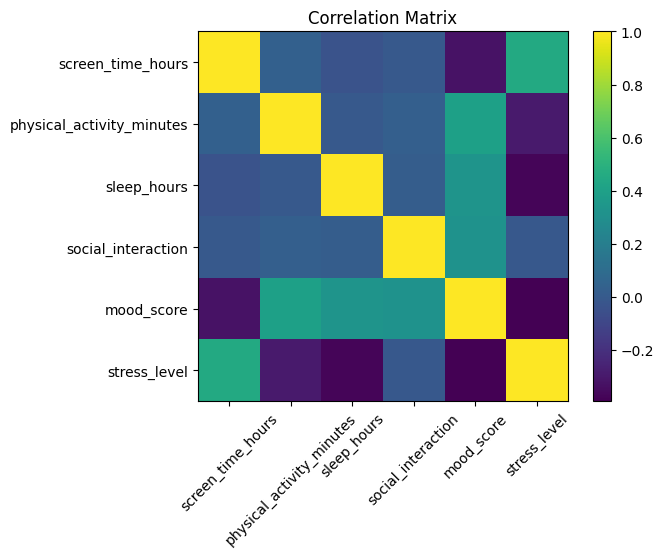

In [11]:
corr = df[
    [
        "screen_time_hours",
        "physical_activity_minutes",
        "sleep_hours",
        "social_interaction",
        "mood_score",
        "stress_level"
    ]
].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix confirms the patterns observed in the exploratory analysis. Negative correlations were found between screen time and mood, as well as positive correlations between physical activity, sleep duration, and mood. Furthermore, stress levels showed a clear negative correlation with mood. These relationships, although moderate, are consistent with theoretical models of human behavior and suggest that daily habits can provide relevant information for predicting emotional well-being.

In [14]:
df["low_mood"] = (df["mood_score"] <= 5).astype(int)
df["low_mood"].value_counts()

,count
low_mood,
0,3540
1,60


In [15]:
low_mood_rate = df["low_mood"].mean()
print(f"Proportion of low mood records: {low_mood_rate:.2%}")

Proportion of low mood records: 1.67%


Conclusions:


*   Daily habits such as physical activity and sleep show a positive association with mood.
*   Higher screen time tends to be weakly associated with lower mood and higher stress.
*   No single habit fully explains emotional well-being; results suggest multifactorial patterns.
*   Findings are exploratory and do not imply causation.
*   This analysis highlights the potential of behavioral data for understanding emotional well-being.







Limitations:


*   Data is synthetically generated and may not capture all real-world complexities.
*   Correlation does not imply causation.
*   Results should be interpreted as exploratory insights.



